In [167]:
import pandas as pd
from nltk.util import ngrams
import ast
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [168]:
df_final = pd.read_csv(r'final_output.csv')
df_processed = pd.read_csv(r'processed_data.csv')

In [169]:
df_final.columns

Index(['Unnamed: 0', 'Inc. ID', 'LSR Life Saving Rules - Key',
       'LSR Life Saving Rules', 'Summary', 'Noun Phrases', 'Verbs',
       'Summary Nouns', 'BID Immediate Action Description',
       'Immediate Action Noun Phrases', 'Immediate Action Verbs',
       'Immediate Action Nouns', 'Single Summary Nouns',
       'Immediate Action Single Nouns', 'Excavate Incidents Summary',
       'Excavate Incidents Immediate Action', 'Excavate Final Incidents',
       'Summary Biagram', 'Summary Unigram', 'Summary Trigram',
       'Immediate Action Unigram', 'Immediate Action Bigram',
       'Immediate Action Trigram'],
      dtype='object')

In [151]:
df_final['Summary Nouns'][0]

"['meter', 'station', 'land', 'owner', 'work', 'property', 'hoe', 'call', 'ticket', 'inch', 'trench', 'safety', 'ticket', 'work']"

In [81]:
def generate_ngrams(s,n):
    d = ast.literal_eval(s) #convert string representation of list to an actual list
    ngrams = zip(*[d[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [97]:
df_final['Immediate Action Trigram'] = ''
for index, value in enumerate(df_processed['Immediate Action Removed Stop Words']):
        output_ngram = generate_ngrams(value, 3)
        df_final['Immediate Action Trigram'][index] = output_ngram
    

<ipython-input-97-92eea0ddba11>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Immediate Action Trigram'][index] = output_ngram


In [170]:
df_final['Immediate Action Trigram'][8]

"['water ice got', 'ice got truck', 'got truck felt', 'truck felt hanging', 'felt hanging wheel', 'hanging wheel truck', 'wheel truck team', 'truck team lead']"

In [99]:
df_final.to_csv('final_output.csv')

In [192]:
df_final['Noun Phrases'][0]

"['working meter station', 'land owner', 'property small hoe ticket', 'inch trench', 'safety ticket', 'work']"

In [153]:
# 'from collections import defaultdict' -> this is needed to use a proper dictionary to store the word count
def generate_word_count(df_column):
    word_count = defaultdict(int)
    for list_data in df_column:
        d = ast.literal_eval(list_data)
        for word in d:
            word_count[word] += 1
    return word_count


In [184]:
#Generate word count for Nouns and Verbs
summary_word_noun_count = generate_word_count(df_final['Summary Nouns'])
summary_word_verb_count = generate_word_count(df_final['Verbs'])
summary_word_nounPhrases_count = generate_word_count(df_final['Noun Phrases'])

immediate_action_noun_count = generate_word_count(df_final['Immediate Action Nouns'])
immediate_action_verb_count = generate_word_count(df_final['Immediate Action Verbs'])
immediate_action_nounPhrases_count = generate_word_count(df_final['Immediate Action Noun Phrases'])

In [172]:
#Generate word count for Biagrams
summary_bigram_count = generate_word_count(df_final['Summary Biagram'])
immediate_action_bigram_count = generate_word_count(df_final['Immediate Action Bigram'])

In [185]:
#sort the dictionary of word counts in descending order and create a pandas dataframe out of it
df_summary_nouns = pd.DataFrame(sorted(summary_word_noun_count.items(), key=lambda x:x[1], reverse=True))
df_summary_verbs = pd.DataFrame(sorted(summary_word_verb_count.items(), key=lambda x:x[1], reverse=True))
df_summary_nounPhrases = pd.DataFrame(sorted(summary_word_nounPhrases_count.items(), key=lambda x:x[1], reverse=True))

df_immediate_action_nouns = pd.DataFrame(sorted(immediate_action_noun_count.items(), key=lambda x:x[1], reverse= True))
df_immediate_action_verbs = pd.DataFrame(sorted(immediate_action_verb_count.items(), key=lambda x:x[1], reverse= True))
df_immediate_action_nounPhrases = pd.DataFrame(sorted(immediate_action_nounPhrases_count.items(), key=lambda x:x[1], reverse= True))

In [174]:
#sort the dictionary of word counts in descending order and create a pandas dataframe out of it
df_summary_bigram = pd.DataFrame(sorted(summary_bigram_count.items(), key=lambda x:x[1], reverse=True))
df_immediate_action_bigram = pd.DataFrame(sorted(immediate_action_bigram_count.items(), key=lambda x:x[1], reverse=True))

In [186]:
top_ten_summary_nouns = df_summary_nouns[0][:10] #this is for the x-coordinate of the bar graph as labels
top_ten_summary_noun_counts = df_summary_nouns[1][:10] #this is for the heights of the bar graph based on the count

top_ten_summary_verbs = df_summary_verbs[0][:10] #this is for the x-coordinate of the bar graph as labels
top_ten_summary_verb_counts = df_summary_verbs[1][:10] #this is for the x-coordinate of the bar graph as labels

top_ten_summary_nounPhrases = df_summary_nounPhrases[0][:10] #this is for the x-coordinate of the bar graph as labels
top_ten_summary_nounPhrases_counts = df_summary_nounPhrases[1][:10] #this is for the heights of the bar graph based on the count

In [187]:
top_ten_immediate_action_nouns = df_immediate_action_nouns[0][:10] #this is for the x-coordinate of the bar graph as labels
top_ten_immediate_action_noun_counts = df_immediate_action_nouns[1][:10] #this is for the heights of the bar graph based on the count

top_ten_immediate_action_verbs = df_immediate_action_verbs[0][:10]
top_ten_immediate_action_verb_counts = df_immediate_action_verbs[1][:10]

top_ten_immediate_action_nounPhrases = df_immediate_action_nounPhrases[0][:10] #this is for the x-coordinate of the bar graph as labels
top_ten_immediate_action_nounPhrases_counts = df_immediate_action_nounPhrases[1][:10] #this is for the heights of the bar graph based on the count

In [177]:
top_ten_summary_bigram_words = df_summary_bigram[0][:10] #this is for the x-coordinate of the bar graph as labels
top_ten_summary_bigram_count = df_summary_bigram[1][:10] #this is for the heights of the bar graph based on the count

top_ten_immediate_action_bigram_words = df_immediate_action_bigram[0][:10] #this is for the x-coordinate of the bar graph as labels
top_ten_immediate_action_bigram_count = df_immediate_action_bigram[1][:10] #this is for the heights of the bar graph based on the count

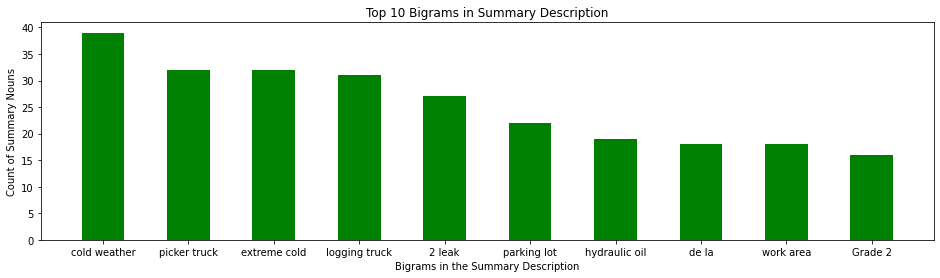

In [189]:
plt.figure(1, figsize=(16, 4))
plt.bar(top_ten_summary_bigram_words, top_ten_summary_bigram_count, color='green', width= 0.5)
plt.xlabel('Bigrams in the Summary Description')
plt.ylabel('Count of Summary Nouns')
plt.title('Top 10 Bigrams in Summary Description')
plt.savefig('top_ten_summary_bigrams.png')
plt.show()

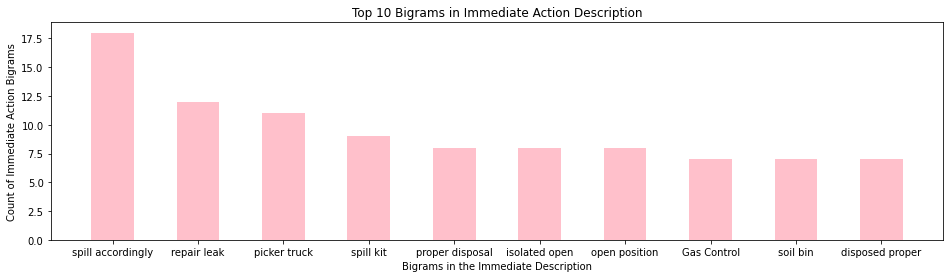

In [190]:
plt.figure(1, figsize=(16, 4))
plt.bar(top_ten_immediate_action_bigram_words, top_ten_immediate_action_bigram_count, color='pink', width= 0.5)
plt.xlabel('Bigrams in the Immediate Description')
plt.ylabel('Count of Immediate Action Bigrams')
plt.title('Top 10 Bigrams in Immediate Action Description')
plt.savefig('top_ten_immediate_action_bigrams.png')
plt.show()

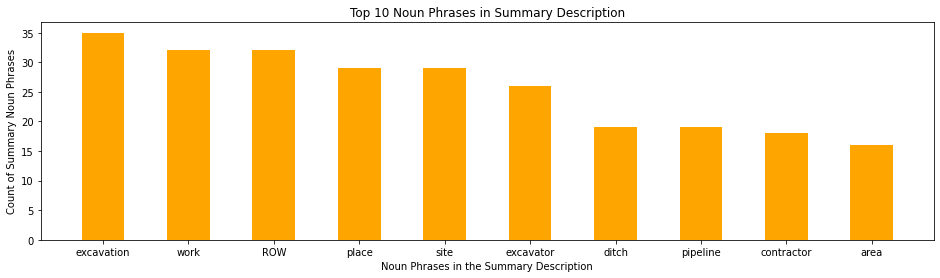

In [191]:
plt.figure(1, figsize=(16, 4))
plt.bar(top_ten_summary_nounPhrases, top_ten_summary_nounPhrases_counts, color='orange', width= 0.5)
plt.xlabel('Noun Phrases in the Summary Description')
plt.ylabel('Count of Summary Noun Phrases')
plt.title('Top 10 Noun Phrases in Summary Description')
plt.savefig('top_ten_summary_noun_phrases.png')
plt.show()

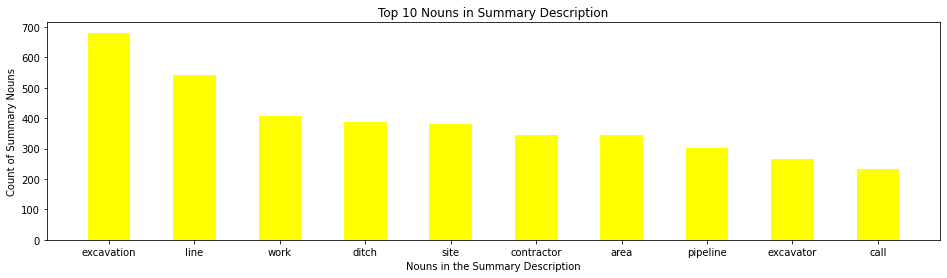

In [188]:
plt.figure(1, figsize=(16, 4))
plt.bar(top_ten_summary_nouns, top_ten_summary_noun_counts, color='yellow', width= 0.5)
plt.xlabel('Nouns in the Summary Description')
plt.ylabel('Count of Summary Nouns')
plt.title('Top 10 Nouns in Summary Description')
plt.savefig('top_ten_summary_nouns.png')
plt.show()


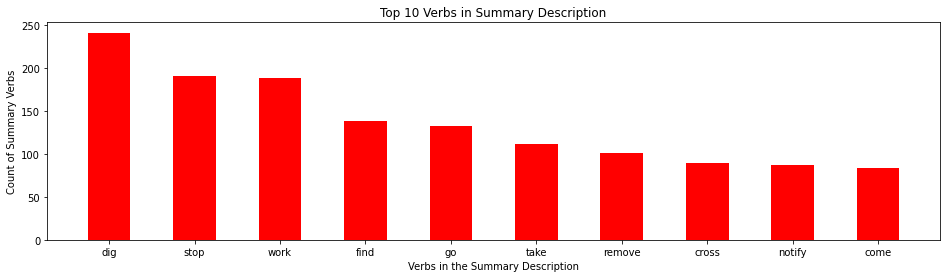

In [181]:
plt.figure(1, figsize=(16, 4))
plt.bar(top_ten_summary_verbs, top_ten_summary_verb_counts, color='red', width= 0.5)
plt.xlabel('Verbs in the Summary Description')
plt.ylabel('Count of Summary Verbs')
plt.title('Top 10 Verbs in Summary Description')
plt.savefig('top_ten_summary_verbs.png')
plt.show()

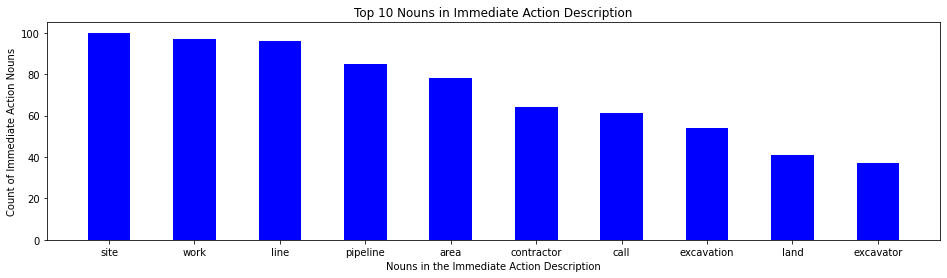

In [182]:
plt.figure(1, figsize=(16, 4))
plt.bar(top_ten_immediate_action_nouns, top_ten_immediate_action_noun_counts, color='blue', width=0.5)
plt.xlabel('Nouns in the Immediate Action Description')
plt.ylabel('Count of Immediate Action Nouns')
plt.title('Top 10 Nouns in Immediate Action Description')
plt.savefig('top_ten_immediate_action_nouns.png')
plt.show()

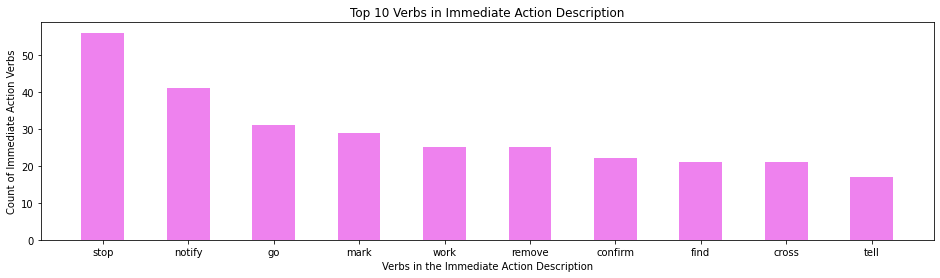

In [183]:
plt.figure(1, figsize=(16, 4))
plt.bar(top_ten_immediate_action_verbs, top_ten_immediate_action_verb_counts, color='violet', width=0.5)
plt.xlabel('Verbs in the Immediate Action Description')
plt.ylabel('Count of Immediate Action Verbs')
plt.title('Top 10 Verbs in Immediate Action Description')
plt.savefig('top_ten_immediate_action_verbs.png')
plt.show()

In [ ]:
plt.figure(1, figsize=(16, 4))
plt.bar(top_ten_immediate_action_nounPhrases, top_ten_immediate_action_nounPhrases_counts, color='black', width=0.5)
plt.xlabel('Noun Phrases in the Immediate Action Description')
plt.ylabel('Count of Immediate Action Noun Phrases')
plt.title('Top 10 Noun Phrases in Immediate Action Description')
plt.savefig('top_ten_immediate_action_noun_phrases.png')
plt.show()